In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/processed_nfe/nfe_5000_estr.csv')

print(df.columns)

Index(['CHAVE DE ACESSO', 'MODELO', 'SÉRIE', 'NÚMERO', 'NATUREZA DA OPERAÇÃO',
       'DATA EMISSÃO', 'EVENTO MAIS RECENTE', 'DATA/HORA EVENTO MAIS RECENTE',
       'CPF/CNPJ Emitente', 'RAZÃO SOCIAL EMITENTE',
       'INSCRIÇÃO ESTADUAL EMITENTE', 'UF EMITENTE', 'MUNICÍPIO EMITENTE',
       'CNPJ DESTINATÁRIO', 'NOME DESTINATÁRIO', 'UF DESTINATÁRIO',
       'INDICADOR IE DESTINATÁRIO', 'DESTINO DA OPERAÇÃO', 'CONSUMIDOR FINAL',
       'PRESENÇA DO COMPRADOR', 'VALOR NOTA FISCAL', 'NÚMERO PRODUTO',
       'DESCRIÇÃO DO PRODUTO/SERVIÇO', 'CÓDIGO NCM/SH',
       'NCM/SH (TIPO DE PRODUTO)', 'CFOP', 'QUANTIDADE', 'UNIDADE',
       'VALOR UNITÁRIO', 'VALOR TOTAL', 'ANO MES'],
      dtype='object')


In [3]:
df['VALOR NOTA FISCAL'] = df['VALOR NOTA FISCAL'].replace(',','.',regex=True).astype(float)
df['VALOR UNITÁRIO'] = df['VALOR UNITÁRIO'].replace(',','.',regex=True).astype(float)
df['VALOR TOTAL'] = df['VALOR TOTAL'].replace(',','.',regex=True).astype(float)
df['QUANTIDADE'] = df['QUANTIDADE'].replace(',','.',regex=True).astype(float)
df['DATA EMISSÃO'] = pd.to_datetime(df['DATA EMISSÃO'])

In [4]:
df['EVENTO MAIS RECENTE'].value_counts()

Autorização de Uso                                        4593
Cancelamento da NF-e                                       201
Carta de correção                                          144
Manifestação do destinatário - Ciência da operação          54
Manifestação do destinatário - Confirmação da operação       8
Name: EVENTO MAIS RECENTE, dtype: int64

In [5]:
df['PRESENÇA DO COMPRADOR'].value_counts()

0 - NÃO SE APLICA                               1748
9 - OPERAÇÃO NÃO PRESENCIAL, OUTROS             1610
1 - OPERAÇÃO PRESENCIAL                         1399
3 - OPERAÇÃO NÃO PRESENCIAL, TELEATENDIMENTO     141
2 - OPERAÇÃO NÃO PRESENCIAL, PELA INTERNET        94
5 - NÃO INFORMADO                                  8
Name: PRESENÇA DO COMPRADOR, dtype: int64

In [6]:
df['CÓDIGO NCM/SH'].value_counts()

 49019900    421
 90189099    197
-1           191
 90211020    151
 7099990      61
            ... 
 72171090      1
 17011200      1
 38101020      1
 42023900      1
 84549090      1
Name: CÓDIGO NCM/SH, Length: 1169, dtype: int64

In [7]:
df['INDICADOR IE DESTINATÁRIO'].value_counts()

NÃO CONTRIBUINTE       3420
CONTRIBUINTE ISENTO    1334
CONTRIBUINTE ICMS       246
Name: INDICADOR IE DESTINATÁRIO, dtype: int64

In [8]:
df['INSCRIÇÃO ESTADUAL EMITENTE'].value_counts()

ISENTO          106
1240248412       89
112388853119     88
0963698885       76
82346988         51
               ... 
1570054859        1
204685745         1
251826155         1
124750029         1
86816032          1
Name: INSCRIÇÃO ESTADUAL EMITENTE, Length: 2499, dtype: int64

In [9]:
df['CONSUMIDOR FINAL'].value_counts()

1 - CONSUMIDOR FINAL    4139
0 - NORMAL               861
Name: CONSUMIDOR FINAL, dtype: int64

In [10]:
df['DESTINO DA OPERAÇÃO'].value_counts()

1 - OPERAÇÃO INTERNA          3126
2 - OPERAÇÃO INTERESTADUAL    1874
Name: DESTINO DA OPERAÇÃO, dtype: int64

In [11]:
df[['NATUREZA DA OPERAÇÃO', 'DATA EMISSÃO', 'EVENTO MAIS RECENTE',
       'RAZÃO SOCIAL EMITENTE','UF EMITENTE', 'MUNICÍPIO EMITENTE',
       'NOME DESTINATÁRIO', 'UF DESTINATÁRIO',
       'INDICADOR IE DESTINATÁRIO', 'CONSUMIDOR FINAL',
       'PRESENÇA DO COMPRADOR', 'VALOR NOTA FISCAL',
       'DESCRIÇÃO DO PRODUTO/SERVIÇO', 'CÓDIGO NCM/SH',
       'NCM/SH (TIPO DE PRODUTO)', 'CFOP', 'QUANTIDADE', 'UNIDADE',
       'VALOR UNITÁRIO', 'VALOR TOTAL']].head()

,NATUREZA DA OPERAÇÃO,DATA EMISSÃO,EVENTO MAIS RECENTE,RAZÃO SOCIAL EMITENTE,UF EMITENTE,MUNICÍPIO EMITENTE,NOME DESTINATÁRIO,UF DESTINATÁRIO,INDICADOR IE DESTINATÁRIO,CONSUMIDOR FINAL,PRESENÇA DO COMPRADOR,VALOR NOTA FISCAL,DESCRIÇÃO DO PRODUTO/SERVIÇO,CÓDIGO NCM/SH,NCM/SH (TIPO DE PRODUTO),CFOP,QUANTIDADE,UNIDADE,VALOR UNITÁRIO,VALOR TOTAL
0,VENDA DE MERC ADQ OU REC DE TERCS ENT AO DEST ...,2021-10-28 10:03:29,Carta de correção,ANA MARIA PIRES BELEM,RS,PORTO ALEGRE,13 COMANDO DE INFANTARIA MOTORIZADA,MT,NÃO CONTRIBUINTE,0 - NORMAL,0 - NÃO SE APLICA,19360.00,OFTALMOSCOPIO ADULTO,90181980,Outros aparelhos de eletrodiagnóstico,6120,5.0,UNIDAD,705.00,3525.00
1,REMESSA DE MERCADORIA,2021-10-28 17:40:21,Autorização de Uso,ENDOSURGICAL IMPORTACAO E COM. DE PROD. MED. L...,MS,CAMPO GRANDE,T12590 - HOSPITAL MILITAR DE AREA DE CAMPO GRA...,MS,NÃO CONTRIBUINTE,1 - CONSUMIDOR FINAL,"9 - OPERAÇÃO NÃO PRESENCIAL, OUTROS",61891.86,"105.2.12 - PARAF.CORTICAL ROSQUEADO (T15) 3,5X12",90211020,Artigos e aparelhos para fraturas,5949,1.0,UNIDAD,115.34,115.34
2,999 - Estorno de NF-e nao cancelada no prazo l...,2021-10-29 16:27:07,Autorização de Uso,ELETRONICA NOVA LTDA,ES,VILA VELHA,MINISTERIO DA FAZENDA,ES,NÃO CONTRIBUINTE,1 - CONSUMIDOR FINAL,1 - OPERAÇÃO PRESENCIAL,1008.00,CANALETA 20X10MM DUTO-X3 2MT BG:UNIDADE:UNIDADE,39162000,"Monofilamentos (monofios), etc, de polímeros d...",1102,1.0,UNIDAD,13.90,13.90
3,6118 - VENDA A ORDEM,2021-10-29 11:10:10,Autorização de Uso,NMQ COMERCIO DE MAQ. EQUIP. LTDA.,PE,RECIFE,MINISTERIO DO DESENVOLVIMENTO REGIONAL,DF,NÃO CONTRIBUINTE,1 - CONSUMIDOR FINAL,1 - OPERAÇÃO PRESENCIAL,280000.00,RETRO 3CX TURBO CAB FIXDIP,84295900,"Outras pás mecânicas, escavadores, carregadora...",6118,1.0,UNIDAD,280000.00,280000.00
4,5405,2021-10-28 08:38:36,Cancelamento da NF-e,M OLIVEIRA SILVA EIRELI,BA,VITORIA DA CONQUISTA,IBGE,BA,NÃO CONTRIBUINTE,1 - CONSUMIDOR FINAL,1 - OPERAÇÃO PRESENCIAL,366.59,FILTRO AR CONDICIONADO (ACP103) TECFIL,84213990,Outros aparelhos para filtrar ou depurar gases,5405,1.0,UNI,21.81,21.81


In [12]:
df['NATUREZA DA OPERAÇÃO'].value_counts()

VENDA                                                    358
VENDA DE MERCADORIA                                      205
Venda                                                    162
OUTRAS SAIDAS                                            158
SIMPLES REMESSA                                          146
                                                        ... 
V FAB PROP DESTINADA A NAO CONTRIBUINTE                    1
SIMPLES REMESSA 5.117/6.117                                1
Venda mercadoria adquirida ou recebida de terceiros        1
10 - OUTRA SAIDA DE MERC. OU PREST. SERVICO                1
VENDA DE MERCADORIA SUJEITA A SUBSTITUICAO TRIBUTARIA      1
Name: NATUREZA DA OPERAÇÃO, Length: 1354, dtype: int64

In [13]:
df['CONSUMIDOR FINAL'].value_counts()

1 - CONSUMIDOR FINAL    4139
0 - NORMAL               861
Name: CONSUMIDOR FINAL, dtype: int64

In [14]:
df['RAZÃO SOCIAL EMITENTE'].value_counts()

BRS SUPRIMENTOS CORPORATIVOS S/A               89
EMPRESA BRASILEIRA DE CORREIOS E TELEGRAFOS    88
ENDOLOG LOGISTICA E ARMAZENS LTDA              84
GM DOS REIS INDUSTRIA E COMERCIO LTDA          55
CASA DA MOEDA DO BRASIL                        51
                                               ..
MACRO ATACADO KROLOW LTDA                       1
GM DISTRIBUIDORA LTDA-EPP                       1
MIT CAR MINAS LTDA                              1
ROHDE E SCHWARZ DO BRASIL LTDA                  1
RAY TECH SOLUCOES EM ENERGIA ELETRICA LTDA      1
Name: RAZÃO SOCIAL EMITENTE, Length: 2513, dtype: int64

In [15]:
df['NOME DESTINATÁRIO'].value_counts()

FUNDO NACIONAL DE DESENVOLVIMENTO DA EDUCACAO             303
COMANDO DA AERONAUTICA                                    139
MINISTERIO DA SAUDE                                       115
MINISTERIO DA CIDADANIA                                   113
HOSPITAL MILITAR DE AREA DE PORTO ALEGRE                   82
                                                         ... 
INSTITUTO FEDERAL DE ALAGOAS                                1
INSTITUTO FED EDUC CIENCIA E TECN FARROUPILHA               1
COMISSAO IMPLANT SISTEMA CONT DO ESPACO AEREO (CISCEA)      1
COORDENACAO REGIONAL SUL DA BAHIA/BA                        1
INSTITUTO BRASILEIRO DO MEIO AMBIENTE E DOS RECURS          1
Name: NOME DESTINATÁRIO, Length: 1056, dtype: int64

In [16]:
df['UF DESTINATÁRIO'].value_counts()

DF    1015
RJ     908
RS     465
SP     352
MG     325
PR     185
MS     179
BA     175
PA     160
PE     145
SC     139
RN     129
AM     127
CE      96
GO      87
MT      85
PB      68
PI      59
RO      53
ES      45
RR      44
MA      38
TO      35
AC      31
AL      26
SE      15
AP      14
Name: UF DESTINATÁRIO, dtype: int64

In [17]:
df['VALOR NOTA FISCAL']

0        19360.00
1        61891.86
2         1008.00
3       280000.00
4          366.59
          ...    
4995      2062.40
4996       606.00
4997       479.58
4998      1131.34
4999        76.50
Name: VALOR NOTA FISCAL, Length: 5000, dtype: float64

In [18]:
df['DATA EMISSÃO ANO'] = pd.DatetimeIndex(df['DATA EMISSÃO']).year

df['DATA EMISSÃO MES'] = pd.DatetimeIndex(df['DATA EMISSÃO']).month
month_dict = {
    1:'Janeiro',
    2:'Fevereiro',
    3:'Março',
    4:'Abril',
    5:'Maio',
    6:'Junho',
    7:'Julho',
    8:'Agosto',
    9:'Setembro',
    10:'Outubro',
    11:'Novembro',
    12:'Dezembro'}
df.replace({"DATA EMISSÃO MES": month_dict}, inplace=True)

df['DATA EMISSÃO DIA'] = pd.DatetimeIndex(df['DATA EMISSÃO']).day
df['DATA EMISSÃO HORA'] = pd.DatetimeIndex(df['DATA EMISSÃO']).hour

df['DATA EMISSÃO PERIODO'] = (df['DATA EMISSÃO HORA'] % 24 + 4) // 4
df['DATA EMISSÃO PERIODO'].replace({1: 'Madrugada',
                      2: 'Início da manhã',
                      3: 'Manhã',
                      4: 'Início da tarde',
                      5: 'Tarde',
                      6: 'Noite'}, inplace=True)

df['DATA EMISSÃO DIA SEMANA'] = pd.DatetimeIndex(df['DATA EMISSÃO']).weekday
days_dict = {
    0:'Segunda-feira',
    1:'Terça-feira',
    2:'Quarta-feira',
    3:'Quinta-Feira',
    4:'Sexta-feira',
    5:'Sábado',
    6:'Domingo'}
df.replace({"DATA EMISSÃO DIA SEMANA": days_dict}, inplace=True)

- 0 a 3 - Madrugada
- 4 a 7 - Início da manhã
- 8 a 11 - Manhã
- 12 a 15 - Início da tarde
- 16 a 19 - Tarde
- 20 a 23 - Noite

In [19]:
df[['DATA EMISSÃO ANO','DATA EMISSÃO MES','DATA EMISSÃO DIA','DATA EMISSÃO DIA SEMANA','DATA EMISSÃO HORA','DATA EMISSÃO PERIODO']].head()

,DATA EMISSÃO ANO,DATA EMISSÃO MES,DATA EMISSÃO DIA,DATA EMISSÃO DIA SEMANA,DATA EMISSÃO HORA,DATA EMISSÃO PERIODO
0,2021,Outubro,28,Quinta-Feira,10,Manhã
1,2021,Outubro,28,Quinta-Feira,17,Tarde
2,2021,Outubro,29,Sexta-feira,16,Tarde
3,2021,Outubro,29,Sexta-feira,11,Manhã
4,2021,Outubro,28,Quinta-Feira,8,Manhã


In [20]:
date_variables = ['DATA EMISSÃO']

text_variables = ['NCM/SH (TIPO DE PRODUTO)','DESCRIÇÃO DO PRODUTO/SERVIÇO', 'NATUREZA DA OPERAÇÃO']

category_variables = ['CFOP', 'UNIDADE', 'CÓDIGO NCM/SH','PRESENÇA DO COMPRADOR', 'INDICADOR IE DESTINATÁRIO', 'UF EMITENTE', 'MUNICÍPIO EMITENTE', 'RAZÃO SOCIAL EMITENTE', 'UF DESTINATÁRIO', 'CONSUMIDOR FINAL', 'NOME DESTINATÁRIO','EVENTO MAIS RECENTE','DATA EMISSÃO MES', 'DATA EMISSÃO DIA SEMANA', 'DATA EMISSÃO PERIODO','DATA EMISSÃO DIA']

num_variables = ['VALOR NOTA FISCAL','QUANTIDADE','VALOR UNITÁRIO','VALOR TOTAL']

In [21]:
for var in text_variables:
    print(var)
    print()
    print(df[var].head())
    print()

NCM/SH (TIPO DE PRODUTO)

0                Outros aparelhos de eletrodiagnóstico
1                    Artigos e aparelhos para fraturas
2    Monofilamentos (monofios), etc, de polímeros d...
3    Outras pás mecânicas, escavadores, carregadora...
4       Outros aparelhos para filtrar ou depurar gases
Name: NCM/SH (TIPO DE PRODUTO), dtype: object

DESCRIÇÃO DO PRODUTO/SERVIÇO

0                                OFTALMOSCOPIO ADULTO
1    105.2.12 - PARAF.CORTICAL ROSQUEADO (T15) 3,5X12
2     CANALETA 20X10MM DUTO-X3 2MT BG:UNIDADE:UNIDADE
3                          RETRO 3CX TURBO CAB FIXDIP
4              FILTRO AR CONDICIONADO (ACP103) TECFIL
Name: DESCRIÇÃO DO PRODUTO/SERVIÇO, dtype: object

NATUREZA DA OPERAÇÃO

0    VENDA DE MERC ADQ OU REC DE TERCS ENT AO DEST ...
1                                REMESSA DE MERCADORIA
2    999 - Estorno de NF-e nao cancelada no prazo l...
3                                 6118 - VENDA A ORDEM
4                                                 5405
Name

VALOR NOTA FISCAL


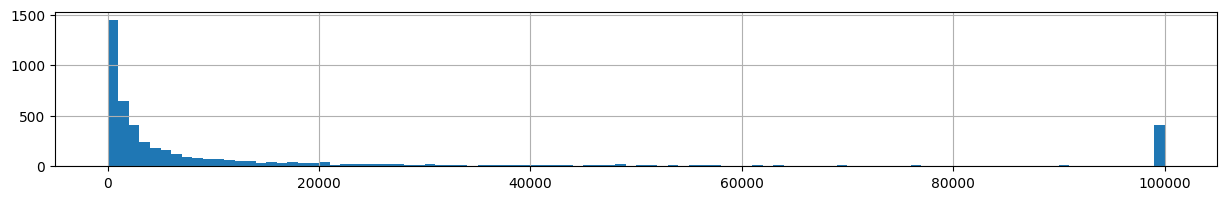

QUANTIDADE


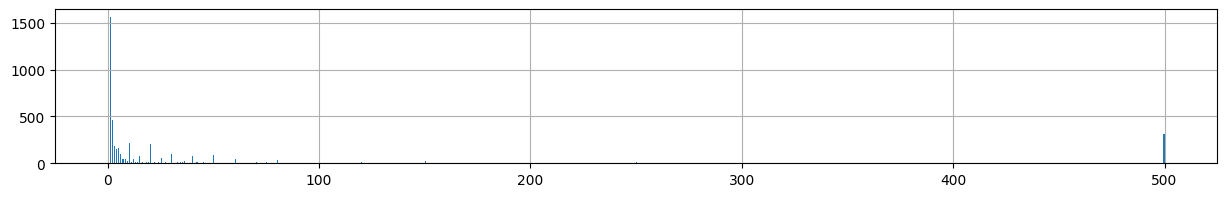

VALOR UNITÁRIO


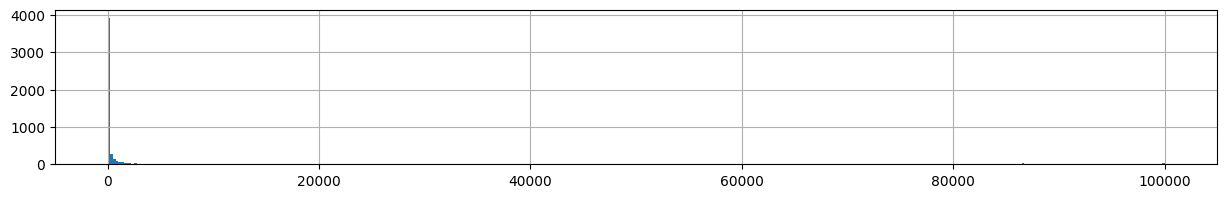

VALOR TOTAL


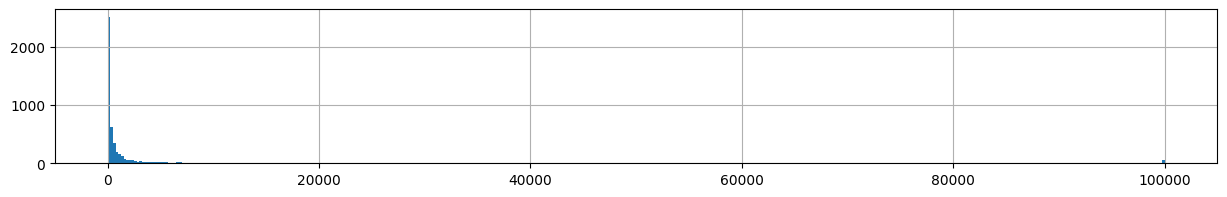

In [22]:
print('VALOR NOTA FISCAL')
np.clip(df['VALOR NOTA FISCAL'], 0, 100000).hist(figsize=(15, 2), bins=100)
plt.show()

print('QUANTIDADE')
np.clip(df['QUANTIDADE'], 0, 500).hist(figsize=(15, 2), bins=1000)
plt.show()

print('VALOR UNITÁRIO')
np.clip(df['VALOR UNITÁRIO'], 0, 100000).hist(figsize=(15, 2), bins=400)
plt.show()

print('VALOR TOTAL')
np.clip(df['VALOR TOTAL'], 0, 100000).hist(figsize=(15, 2), bins=400)
plt.show()

CFOP


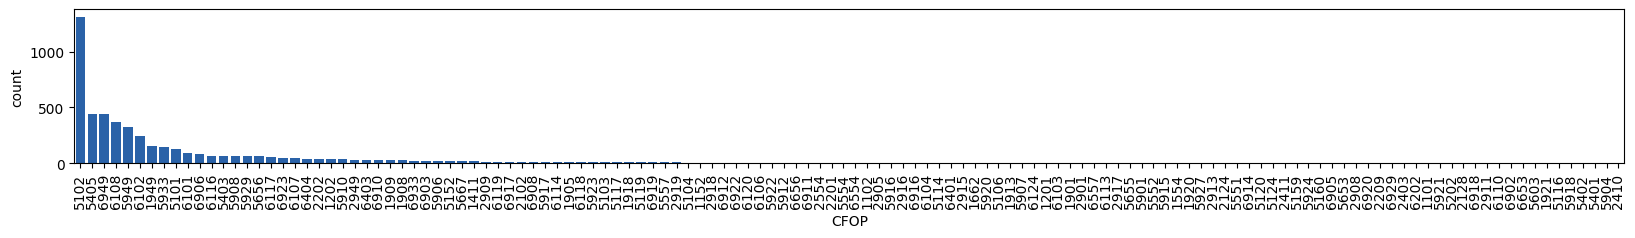

UNIDADE


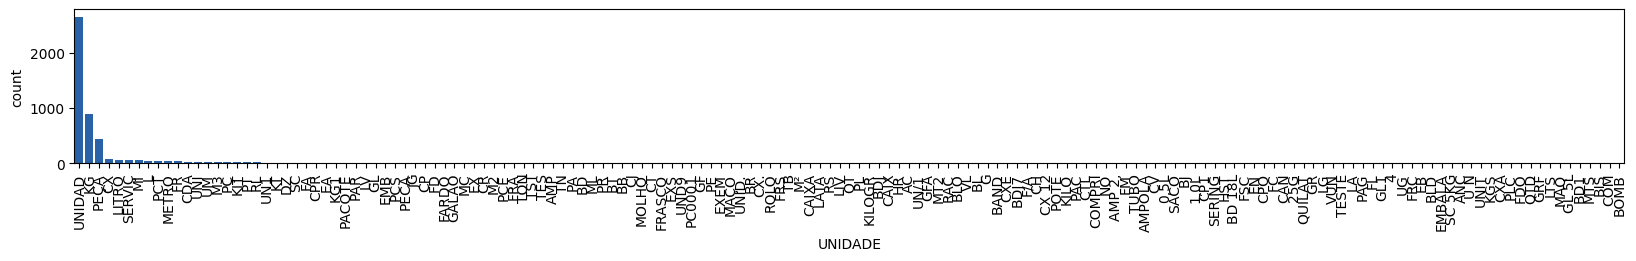

CÓDIGO NCM/SH


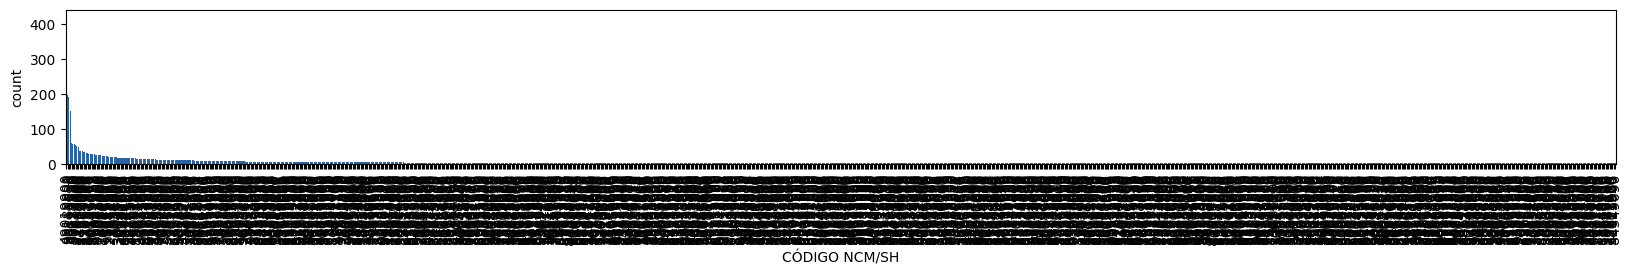

PRESENÇA DO COMPRADOR


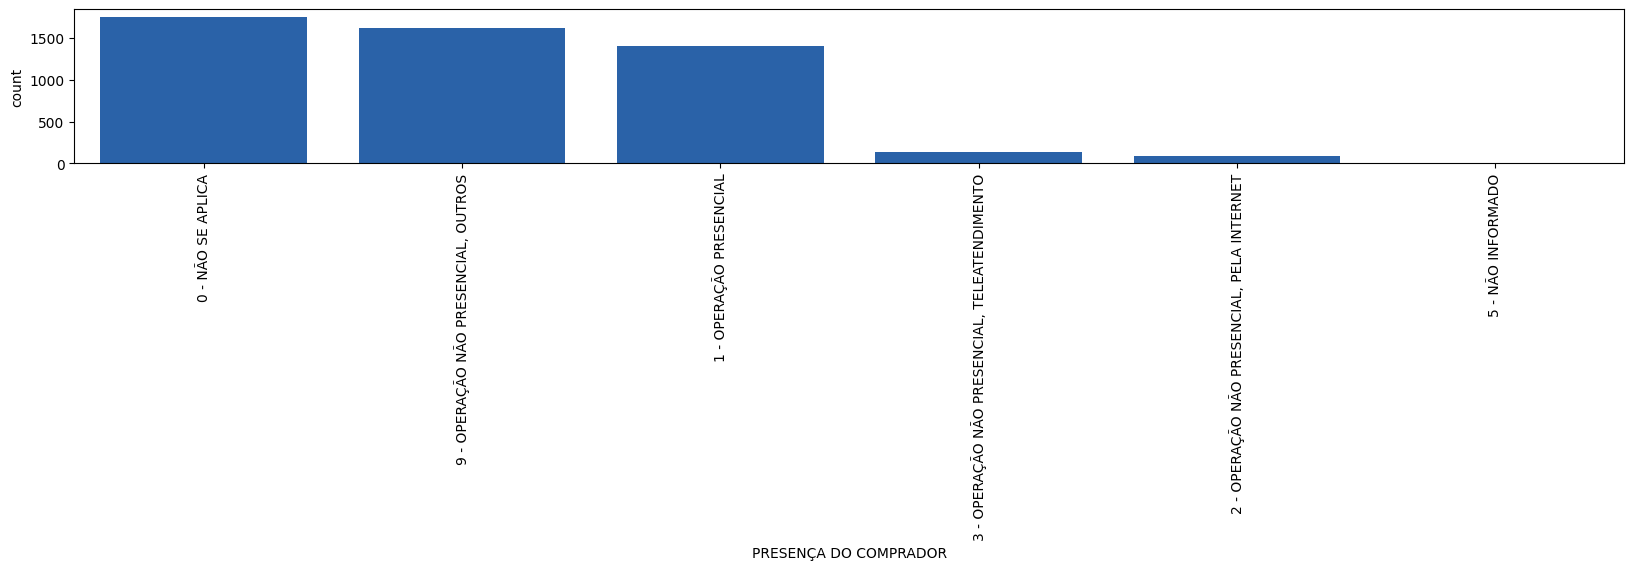

INDICADOR IE DESTINATÁRIO


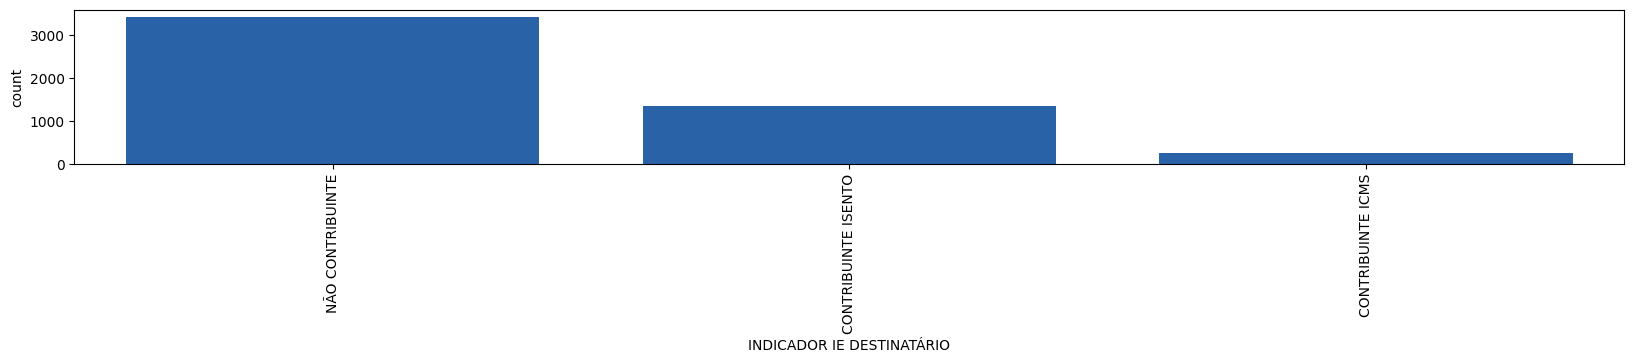

UF EMITENTE


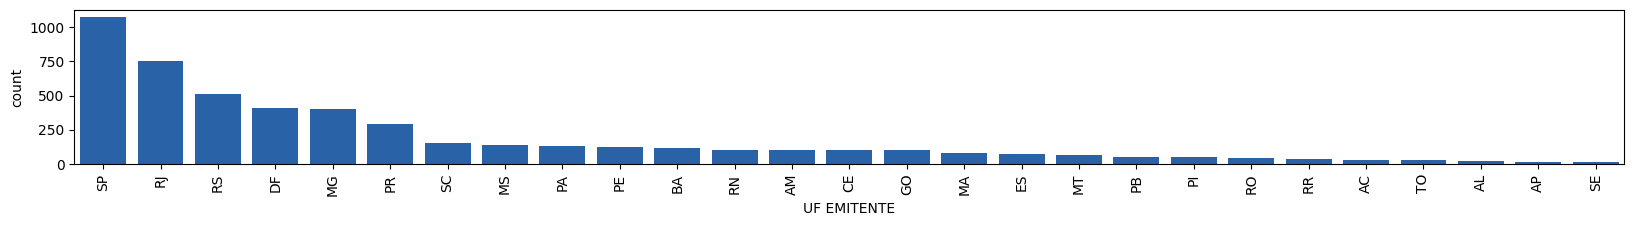

MUNICÍPIO EMITENTE


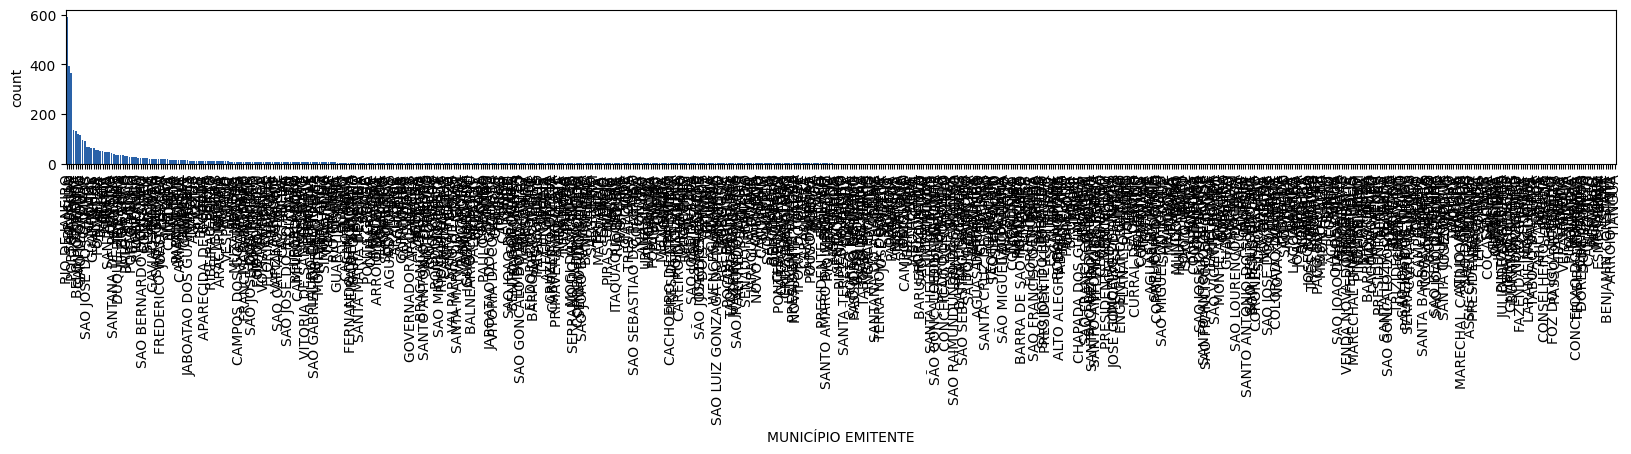

RAZÃO SOCIAL EMITENTE


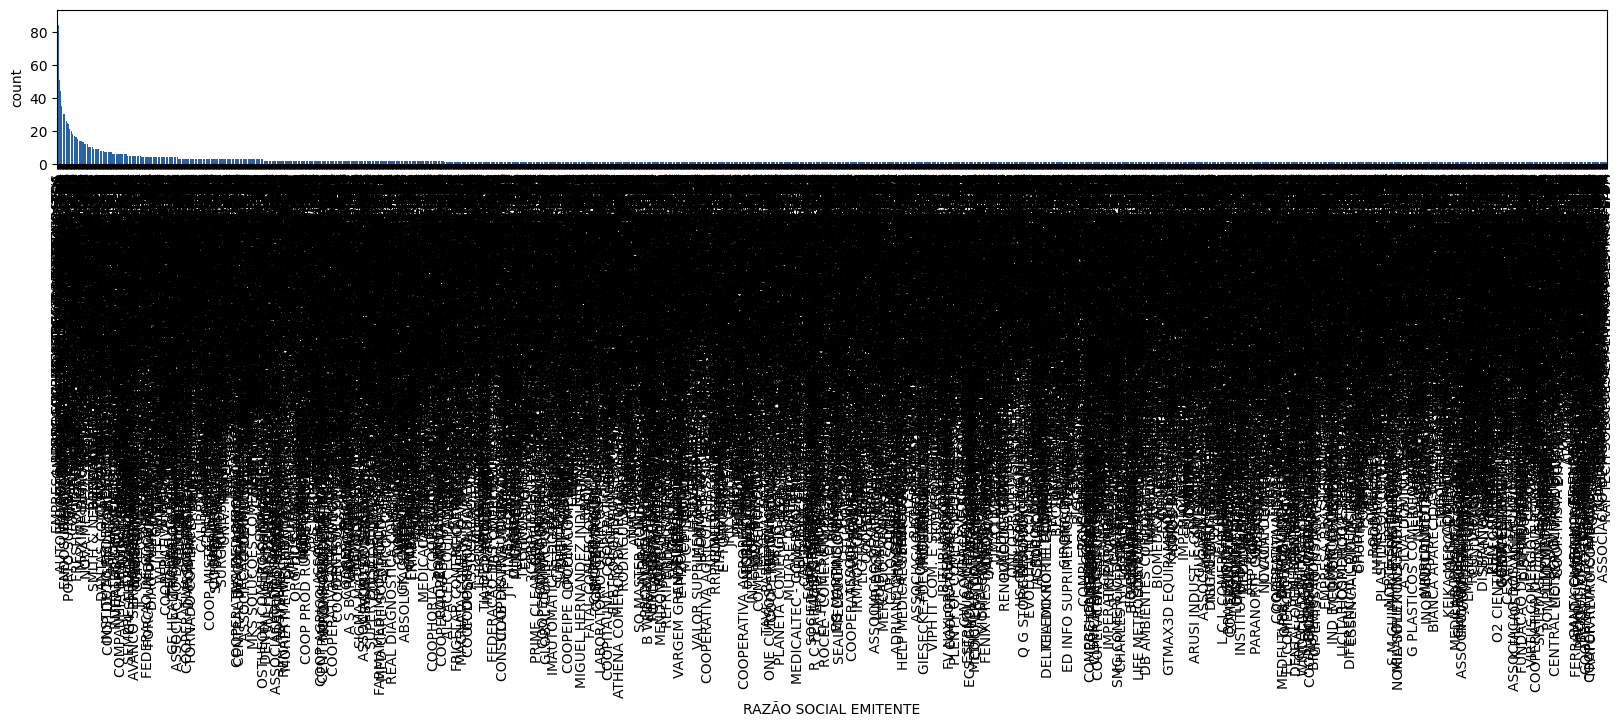

UF DESTINATÁRIO


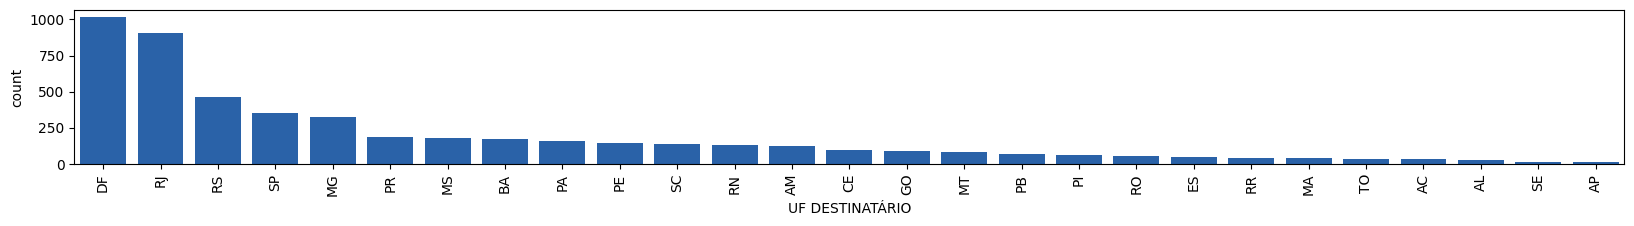

CONSUMIDOR FINAL


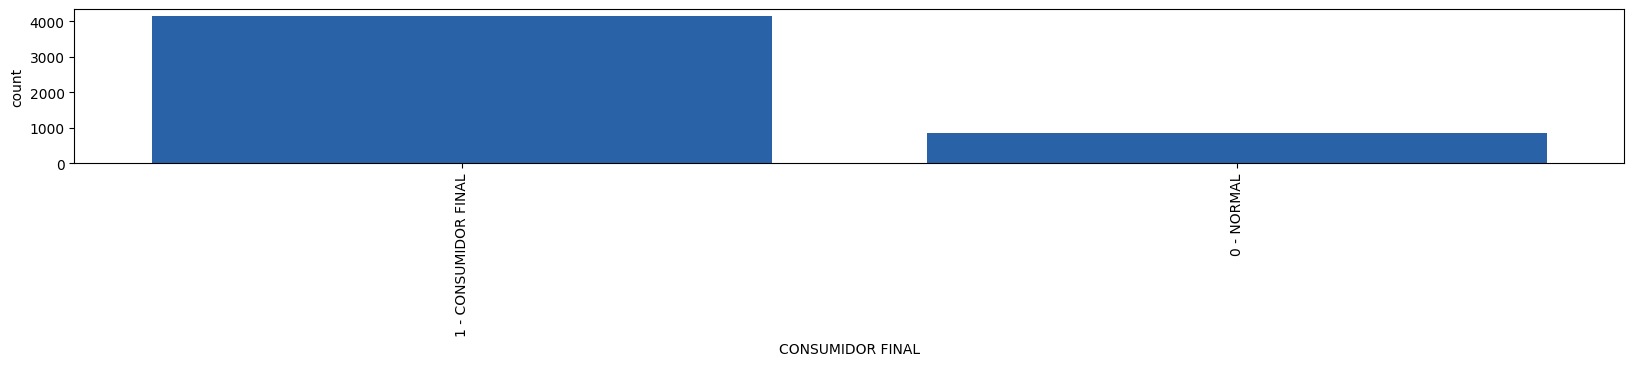

NOME DESTINATÁRIO


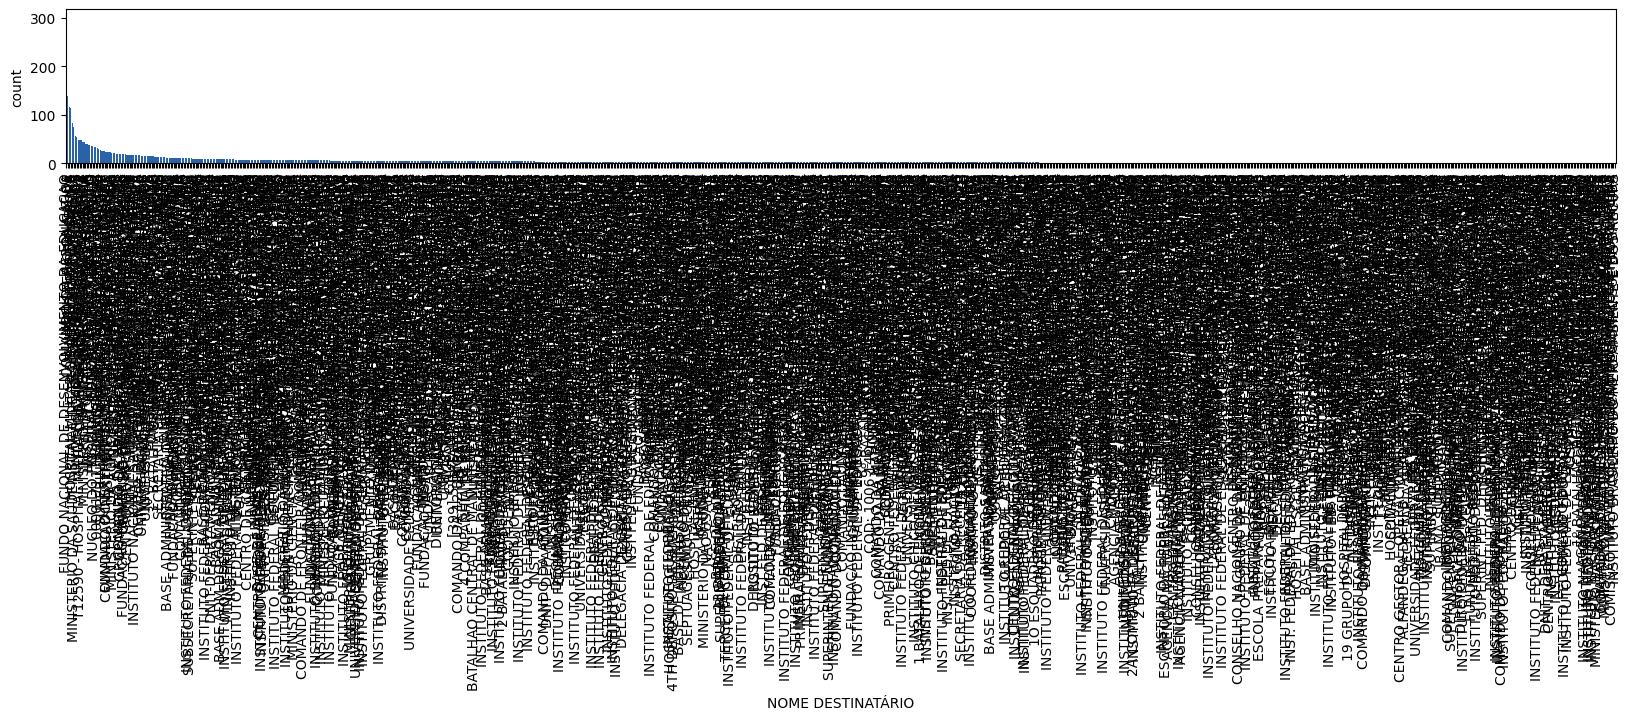

EVENTO MAIS RECENTE


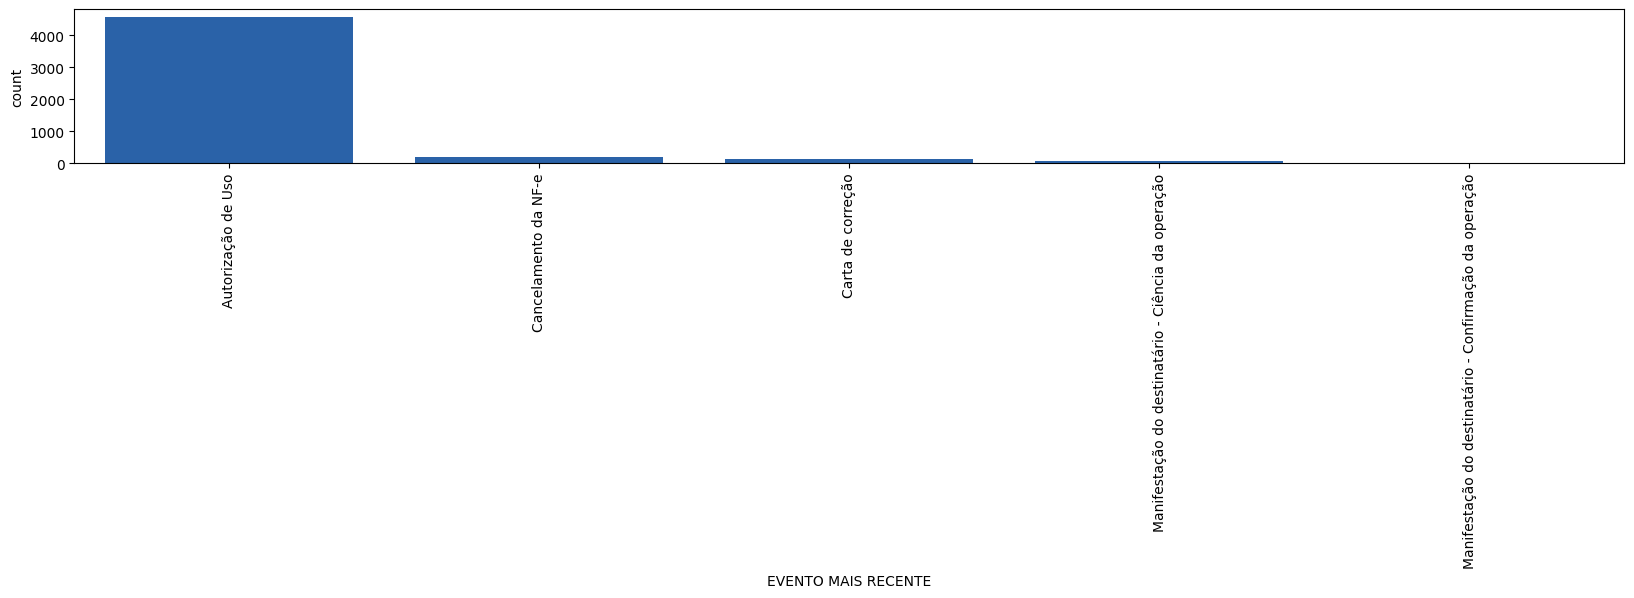

DATA EMISSÃO MES


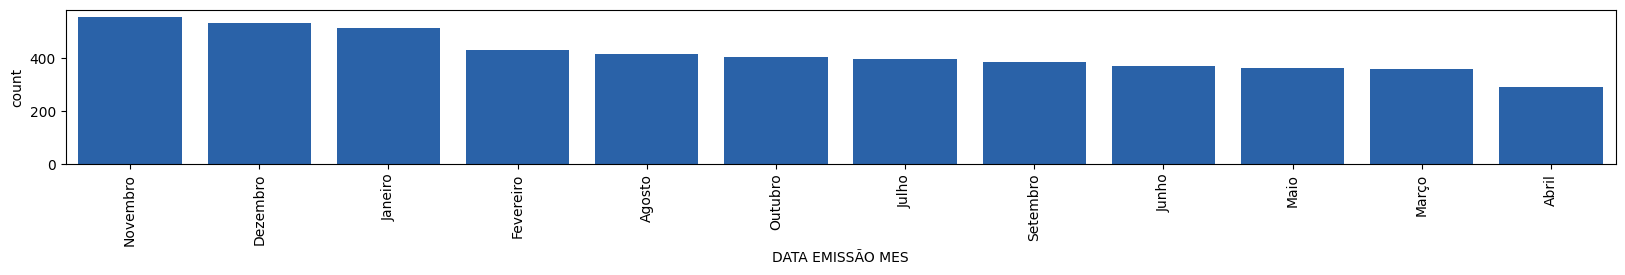

DATA EMISSÃO DIA SEMANA


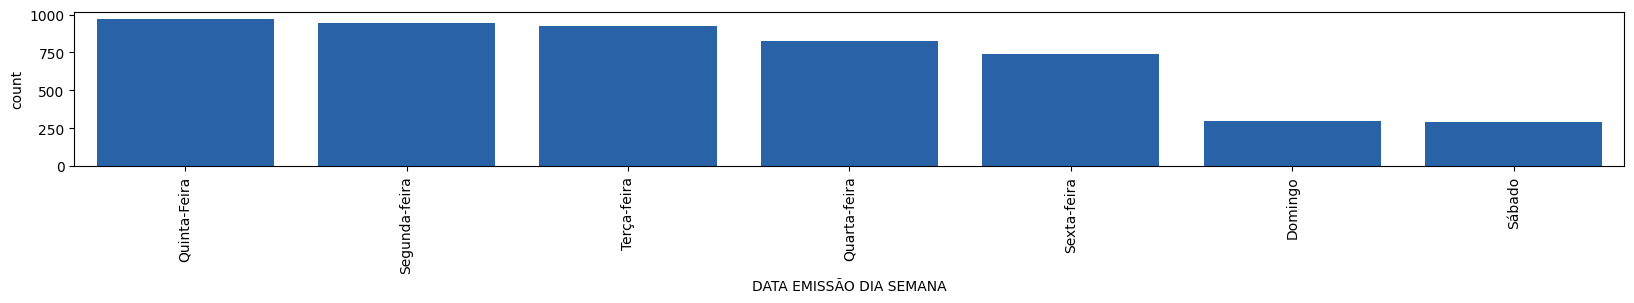

DATA EMISSÃO PERIODO


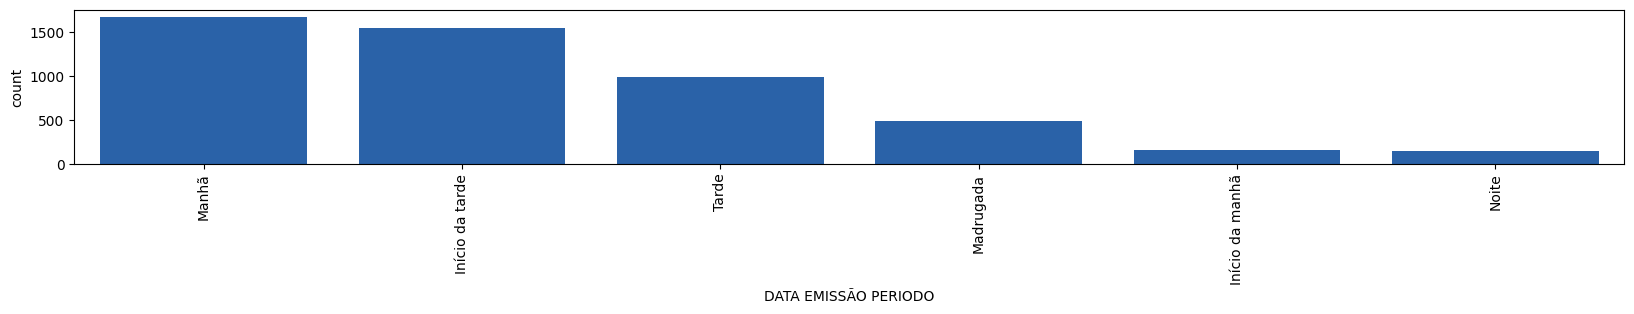

DATA EMISSÃO DIA


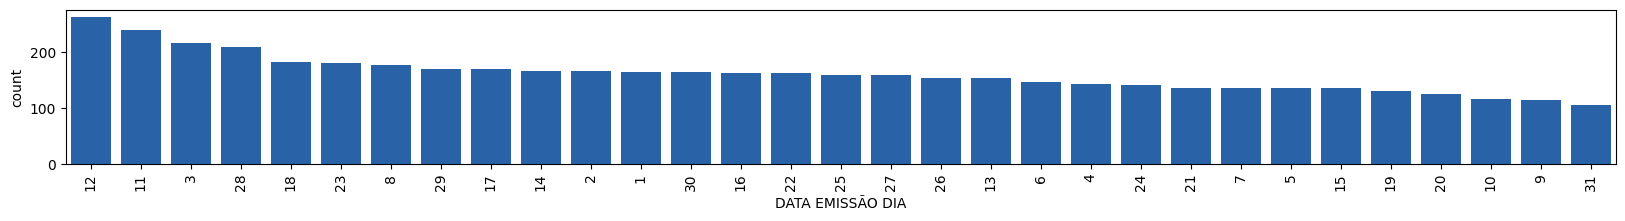

In [23]:
for var in category_variables:
    print(var)
    plt.figure(figsize=(20,2))
    g = sns.countplot(data=df, x=var, color='#1560BD', order=df[var].value_counts().index)
    g.tick_params(axis='x', rotation=90)

    plt.show()